# 马尔可夫链：不可约性和遍历性

```{index} single: 马尔可夫链：不可约性和遍历性
```

除了 Anaconda 中包含的内容外，本教程还需要以下库：

In [1]:
!pip install quantecon


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 概述

这个讲座将继续我们之前关于马尔可夫链的{doc}`<markov_chains_I>`讲座。

我们将具体介绍不可约性和遍历性的概念，并讨论它们与平稳性的联系。

不可约性描述了马尔可夫链在系统中移动的能力，即在不同状态之间转换的能力。

遍历性是一种样本路径性质，描述了系统在长时间内的行为。

正如我们将看到的，

* 不可约马尔可夫链保证存在一个唯一的平稳分布，
* 而遍历的马尔可夫链生成的时间序列则满足大数定律的某种形式。

这些概念共同为理解马尔可夫链的长期行为提供了基础。

让我们从一些标准的导入开始：

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  # 设置默认图形大小
import quantecon as qe
import numpy as np

## 不可约性

为了解释不可约性，让我们把 $P$ 设定为一个固定的随机矩阵。

如果存在正整数 $j$ 和 $k$ 使得

$$
P^j(x, y) > 0
\quad \text{且} \quad
P^k(y, x) > 0
$$

则称两个状态 $x$ 和 $y$ **相互通信**。

鉴于我们{ref}`上面的讨论 <finite_mc_mstp>`，这正是意味着

* 状态 $x$ 最终可以从状态 $y$ 到达，且
* 状态 $y$ 最终可以从状态 $x$ 到达

随机矩阵 $P$ 被称为**不可约的**，如果所有状态都相互通信；也就是说，如果 $(x, y)$ 在 $S \times S$ 中，对于所有的 $x$ 和 $y$，它们都相互通信。

例如，考虑下面的一个虚拟家庭组的财富转移概率：

```{image} /_static/lecture_specific/markov_chains_II/Irre_1.png
:name: mc_irre1
:align: center
```

我们可以将其转换为随机矩阵，节点之间无边的地方设置为零

$$
P :=
\begin{bmatrix} 
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
\end{bmatrix} 
$$

从图中可以看出，这个随机矩阵是不可约的：我们可以最终从任何状态到达任何其他状态。

我们也可以使用 [QuantEcon.py](http://quantecon.org/quantecon-py) 的 MarkovChain 类来测试这一点

In [3]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

## 示例 1

这里有一个更加悲观的场景，其中穷人永远穷

```{image} /_static/lecture_specific/markov_chains_II/Irre_2.png
:name: mc_irre2
:align: center
```

这个随机矩阵不是不可约的，因为例如，富人无法从穷人那访问。

让我们确认这一点

In [4]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

它可能对你来说已经很清楚了，不可约性在长期结果中是很重要的。

例如，在第二个图中，贫困是一种终身刑罚，而在第一个图中不是。

我们稍后会再回到这个问题上。

### 不可约性和平稳性

我们在{ref}`前一课 <stationary>`中讨论了平稳性的唯一性需要转移矩阵在每个地方都是正的。

实际上，如果分布存在，不可约性就足以保证平稳分布的唯一性。

我们可以将{ref}`定理<strict_stationary>`修订为以下基本定理：

```{prf:theorem}
:label: mc_conv_thm

如果 $P$ 是不可约的，那么 $P$ 有且只有一个平稳
分布。
```

证明请参见 {cite}`sargent2023economic`的第4章或{cite}`haggstrom2002finite`的定理5.2。

(ergodicity)=
## 遍历性

请注意在本讲座中我们使用 $\mathbb{1}$ 表示一个全为1的向量。

在不可约性之下，还有一个重要的结果：

````{prf:theorem}
:label: stationary

如果 $P$ 是不可约的，并且 $\psi^*$ 是唯一的平稳分布，那么对于所有 $x \in S$，

```{math}
:label: llnfmc0

\frac{1}{m} \sum_{t = 1}^m \mathbf{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{当 } m \to \infty
```

````

这里

* $\{X_t\}$ 是具有随机矩阵 $P$ 和初始分布 $\psi_0$ 的马尔可夫链
* $\mathbb{1} \{X_t = x\} = 1$ 如果 $X_t = x$ 否则为零

[定理 4.3](llnfmc0) 中的结果有时被称为 **遍历性**。

该定理告诉我们，链在状态 $x$ 所花费的时间分数随着时间无限趋近于 $\psi^*(x)$。

(new_interp_sd)=
这给了我们另一种解释平稳分布的方法（如果不可约性成立的话）。

重要的是，该结果对任何选择的 $\psi_0$ 都有效。

该定理与{doc}`大数定律 <lln_clt>`有关。

它告诉我们，在某些设置下，即使随机变量序列[不是独立同分布](iid_violation)，大数定律有时也成立。

### 示例 1

回想我们对就业/失业模型的横截面解释{ref}`上面讨论的 <mc_eg1-1>`。

假设 $\alpha \in (0,1)$ 且 $\beta \in (0,1)$，所以不可约性成立。

我们看到平稳分布是 $(p, 1-p)$，这里

$$
p = \frac{\beta}{\alpha + \beta}
$$

在横截面解释中，这是失业人员的比例。

鉴于我们最新的（遍历性）结果，这也是单个工人可以预期失业的时间比例。

因此，从长远来看，群体的横截面平均值和给定个人的时间序列平均值是一致的。

这是遍历性概念的一个方面。

### 示例 2

另一个例子是我们{ref}`之前讨论过的 <mc_eg2>`汉密尔顿动力学。

马尔可夫链的{ref}`图 <mc_eg2>`显示它是不可约的。

```


让我们记在每个时间 $t$ 在状态 $x$ 花费的时间百分比为 $\hat p_t(x)$，其中

$$
\hat p_t(x) := \frac{1}{t} \sum_{t = 1}^t \mathbf{1}\{X_t = x\}
$$

这里我们比较不同起点 $x_0$ 的 $\hat p_t(x)$ 和平稳分布 $\psi^* (x)$。

```{code-cell} ipython3
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
ts_length = 10_000
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(15, 6))
ψ_star = mc.stationary_distributions[0]
plt.subplots_adjust(wspace=0.35)

for i in range(n):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color='black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(fr'$\hat p_t({i})$')

    # Compute the fraction of time spent, starting from different x_0s
    for x0, col in ((0, 'blue'), (1, 'green'), (2, 'red')):
        # Generate time series that starts at different x0
        X = mc.simulate(ts_length, init=x0)
        p_hat = (X == i).cumsum() / (1 + np.arange(ts_length, dtype=float))
        axes[i].plot(p_hat, color=col, label=f'$x_0 = \, {x0} $')
    axes[i].legend()
plt.show()
```

### 示例 3

让我们再看一个有六个状态的例子{ref}`之前讨论过 <mc_eg3>`。

$$
P :=
\begin{bmatrix} 
0.86 & 0.11 & 0.03 & 0.00 & 0.00 & 0.00 \\
0.52 & 0.33 & 0.13 & 0.02 & 0.00 & 0.00 \\
0.12 & 0.03 & 0.70 & 0.11 & 0.03 & 0.01 \\
0.13 & 0.02 & 0.35 & 0.36 & 0.10 & 0.04 \\
0.00 & 0.00 & 0.09 & 0.11 & 0.55 & 0.25 \\
0.00 & 0.00 & 0.09 & 0.15 & 0.26 & 0.50
\end{bmatrix} 
$$

该链的{ref}`图 <mc_eg3>`显示所有状态都是可达的，
这表明该链是不可约的。

这里我们可视化 $\hat p_t(x)$ 和平稳分布 $\psi^* (x)$ 在每个状态 $x$ 之间的差异。

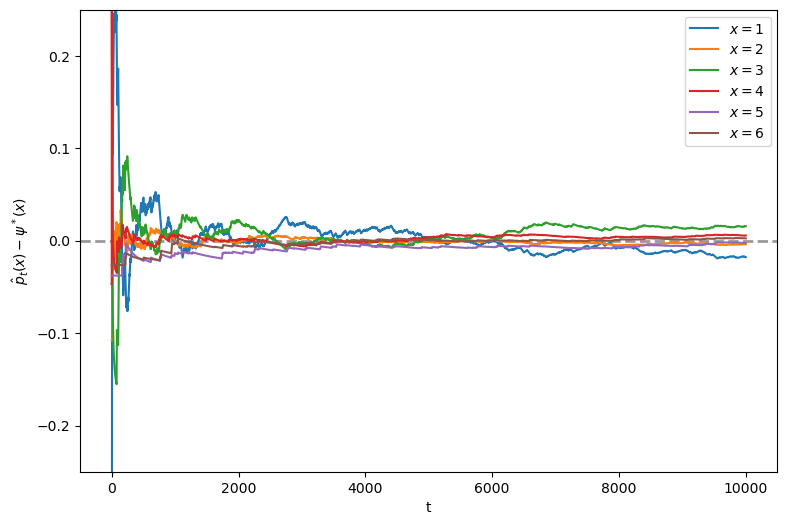

In [5]:
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]

ts_length = 10_000
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, ax = plt.subplots(figsize=(9, 6))
X = mc.simulate(ts_length)
# Center the plot at 0
ax.set_ylim(-0.25, 0.25)
ax.axhline(0, linestyle='dashed', lw=2, color='black', alpha=0.4)


for x0 in range(6):
    # Calculate the fraction of time for each state
    p_hat = (X == x0).cumsum() / (1 + np.arange(ts_length, dtype=float))
    ax.plot(p_hat - ψ_star[x0], label=f'$x = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\hat p_t(x) - \psi^* (x)$')

ax.legend()
plt.show()

## 习题

### 练习 1

考虑以下马尔可夫链：

```{image} /_static/lecture_specific/markov_chains_II/Irre_3.png
:name: mc_irre2
:align: center
```

- 转移矩阵 $P$ 是什么？
- 这个马尔可夫链是不可约的吗？ 为什么？
- 如果不可约性成立，找到平稳分布。

### 练习 2

使用同一个马尔可夫链来模拟时间序列，比较样本路径和平稳分布。

1. 构造长度 $T=1000$ 的链
2. 比较 $\hat p_{1000}(s)$ 和平稳分布 $\psi^*$，你看到什么？
3. 变化 $T \in \{100, 1000, 10000\}$，你看到何种变化模式？

请利用我们在本讲座之前讨论的代码来帮助完成练习。
```


## 进一步阅读

关于马尔可夫链的不可约性和平稳性的更详细探讨，请参阅以下资源：

1. Sargent, T., 2023. *Economic Dynamics*. Princeton University Press.
2. Durrett, R., 2019. *Probability: Theory and Examples*. Cambridge University Press.
3. Häggström, O., 2002. *Finite Markov Chains and Algorithmic Applications*. Cambridge University Press.
```

```{toctree}
:hidden:
:titlesonly:


```


### 定理证明

正如我们讨论的，定理定义了满足一定条件下马尔可夫链的行为。

一部分证明：

```{prf:theorem}
:label: mc_conv_thm

如果 $P$ 是不可约的，那么 $P$ 有且只有一个平稳
分布。
```

证明请参见 {cite}`sargent2023economic`的第4章或{cite}`haggstrom2002finite`的定理5.2。

```{image} /_static/lecture_specific/markov_chains_II/Irre_1.png
:name: mc_irre1
:align: center
```

In [6]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

### 实际应用

从利用不可约性的观察中，我们获得了对马尔可夫链结合横截面数据和时间序列数据的深入理解。

#### 时间序列

1. 利用我们提供的函数模拟时间序列：

2. 使用样本路径观察不同 $\hat p_t(x)$ 和 $\psi^* (x)$ 行为：

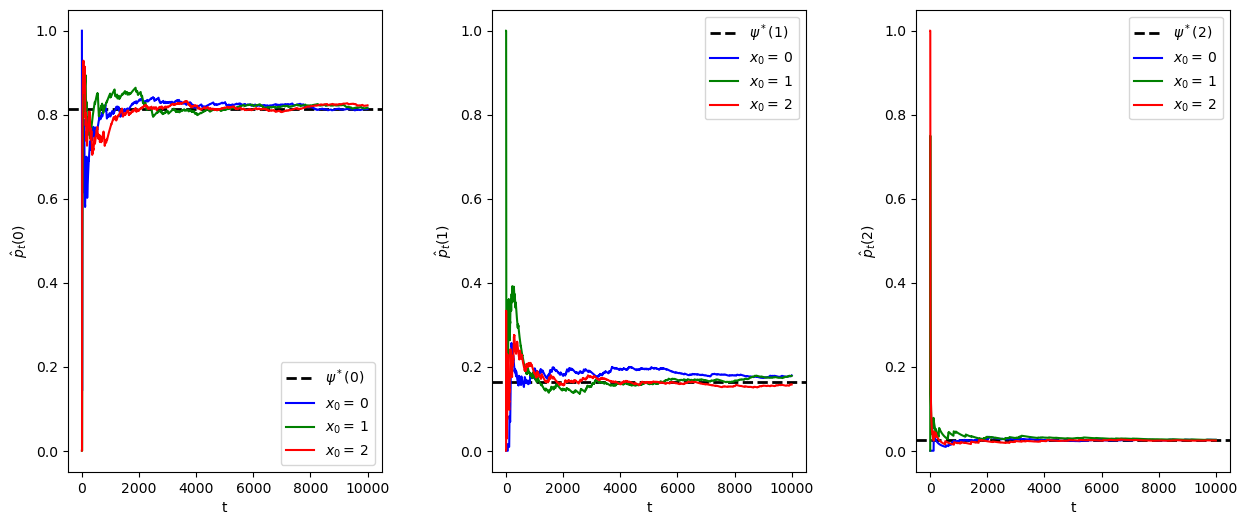

In [7]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
ts_length = 10_000
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(15, 6))
ψ_star = mc.stationary_distributions[0]
plt.subplots_adjust(wspace=0.35)

for i in range(n):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color='black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(fr'$\hat p_t({i})$')

    # 计算每个状态花费的时间比例
    for x0, col in ((0, 'blue'), (1, 'green'), (2, 'red')):
        # 生成从不同 x0 开始的时间序列
        X = mc.simulate(ts_length, init=x0)
        p_hat = (X == i).cumsum() / (1 + np.arange(ts_length, dtype=float))
        axes[i].plot(p_hat, color=col, label=f'$x_0 = \, {x0} $')
    axes[i].legend()
plt.show()

```


## 结论

### 总结

我们已经讨论了马尔可夫链的不可约性、遍历性以及它们对平稳分布的影响。

我们还通过例子展示了不可约性和遍历性如何影响马尔可夫链的长远行为，包括如何从样本路径中计算时间序列的平稳分布。

### 参考文献

1. Sargent, T., 2023. *Economic Dynamics*. Princeton University Press.
2. Häggström, O., 2002. *Finite Markov Chains and Algorithmic Applications*. Cambridge University Press.
3. Durrett, R., 2019. *Probability: Theory and Examples*. Cambridge University Press.
```

```{solution-end}
```